In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
train_features.shape

170500096/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

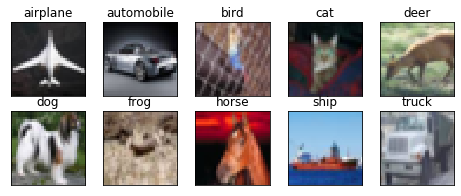

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 13s 34ms/step - loss: 1.8815 - acc: 0.2751 - val_loss: 1.5027 - val_acc: 0.4347
Epoch 2/50
390/390 [==============================] - 8s 21ms/step - loss: 1.3663 - acc: 0.5039 - val_loss: 1.1327 - val_acc: 0.5888
Epoch 3/50
390/390 [==============================] - 8s 21ms/step - loss: 1.1212 - acc: 0.6056 - val_loss: 0.9599 - val_acc: 0.6598
Epoch 4/50
390/390 [==============================] - 8s 21ms/step - loss: 0.9712 - acc: 0.6596 - val_loss: 0.8788 - val_acc: 0.6969
Epoch 5/50
390/390 [==============================] - 8s 22ms/step - loss: 0.8812 - acc: 0.6955 - val_loss: 0.7866 - val_acc: 0.7252
Epoch 6/50
390/390 [==============================] - 8s 21ms/step - loss: 0.8153 - acc: 0.7195 - val_loss: 0.8067 - val_acc: 0.7225
Epoch 7/50
390/390 [==============================] - 8s 21ms/step - loss: 0.7533 - acc: 0.7411 - val_loss: 0.7035 - val_acc: 0.7638
Epoch 8/50
390/390 [==============================] - 8s 21ms/step -

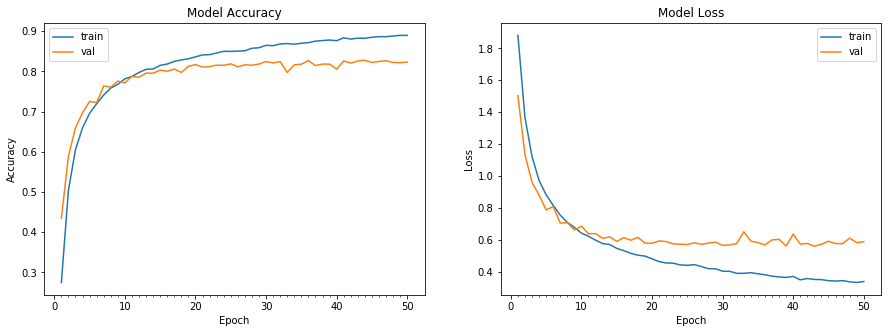

Accuracy on test data is: 82.29


In [50]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [11]:
model.evaluate(test_features, test_labels)

10000/10000 [==============================] - 2s 227us/step


[0.578499518084526, 0.8229]

In [0]:
model_2=None

In [0]:
model_2= Sequential()
model_2.add(SeparableConv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3) )) # 30, 3
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))

model_2.add(SeparableConv2D(64, (3, 3), activation='relu' ))  #28, 5
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))
model_2.add(SeparableConv2D(64, (3, 3), activation='relu' ))  #26, 7
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))
model_2.add(SeparableConv2D(128, (3, 3), activation='relu' )) # 24, 9
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))
model_2.add(SeparableConv2D(128, (3, 3), activation='relu' )) # 22, 11
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))


model_2.add(MaxPooling2D(2))                                    #11, 12
model_2.add(Convolution2D(80, (1, 1), activation='relu' ))       #11, 12
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))

model_2.add(SeparableConv2D(128, (3, 3), activation='relu' ))  #9, 16
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))
model_2.add(SeparableConv2D(128, (3, 3), activation='relu' )) # 7, 20
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))
model_2.add(SeparableConv2D(128, (3, 3), activation='relu' )) # 5, 24
model_2.add(BatchNormalization())
model_2.add(Dropout(rate=0.1))

model_2.add(SeparableConv2D(10, (5,5), activation='relu'))    #1, 32
model_2.add(Flatten())
model_2.add(Activation('softmax'))


In [63]:
model_2.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_148 (Separa (None, 30, 30, 32)        155       
_________________________________________________________________
batch_normalization_91 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_96 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
separable_conv2d_149 (Separa (None, 28, 28, 64)        2400      
_________________________________________________________________
batch_normalization_92 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
dropout_97 (Dropout)         (None, 28, 28, 64)        0         
_________________________________________________________________
separable_conv2d_150 (Separa (None, 26, 26, 64)      

In [0]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Epoch 1/50
  1/781 [..............................] - ETA: 2:15 - loss: 1.4406 - acc: 0.5000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, workers=-1, steps_per_epoch=781, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


781/781 [==============================] - 65s 83ms/step - loss: 1.3250 - acc: 0.5330 - val_loss: 1.2076 - val_acc: 0.5808
Epoch 2/50
781/781 [==============================] - 64s 82ms/step - loss: 1.1493 - acc: 0.5943 - val_loss: 1.0227 - val_acc: 0.6447
Epoch 3/50
781/781 [==============================] - 64s 82ms/step - loss: 1.0517 - acc: 0.6310 - val_loss: 0.9458 - val_acc: 0.6725
Epoch 4/50
781/781 [==============================] - 64s 82ms/step - loss: 0.9861 - acc: 0.6520 - val_loss: 0.8418 - val_acc: 0.7044
Epoch 5/50
781/781 [==============================] - 64s 82ms/step - loss: 0.9392 - acc: 0.6711 - val_loss: 0.8383 - val_acc: 0.7103
Epoch 6/50
781/781 [==============================] - 64s 82ms/step - loss: 0.9085 - acc: 0.6822 - val_loss: 0.8627 - val_acc: 0.7055
Epoch 7/50
781/781 [==============================] - 64s 82ms/step - loss: 0.8771 - acc: 0.6943 - val_loss: 0.7843 - val_acc: 0.7248
Epoch 8/50
781/781 [==============================] - 64s 82ms/step - los

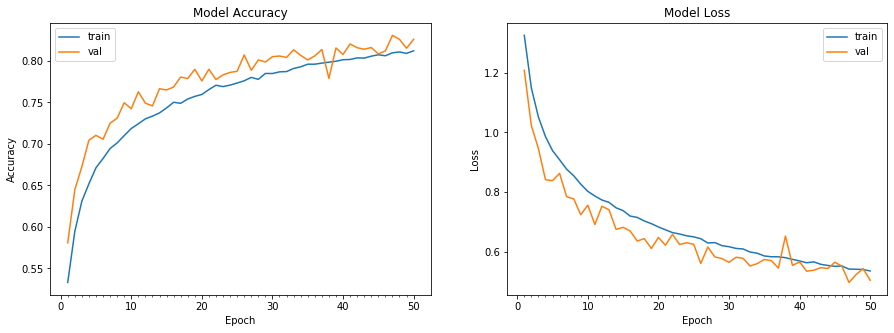

Accuracy on test data is: 82.59


In [66]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(zoom_range=0.4, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model2_info = model_2.fit_generator(datagen.flow(train_features, train_labels, batch_size = 64),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, workers=-1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model2_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model_2))